# STA365 HW3

## Question 1

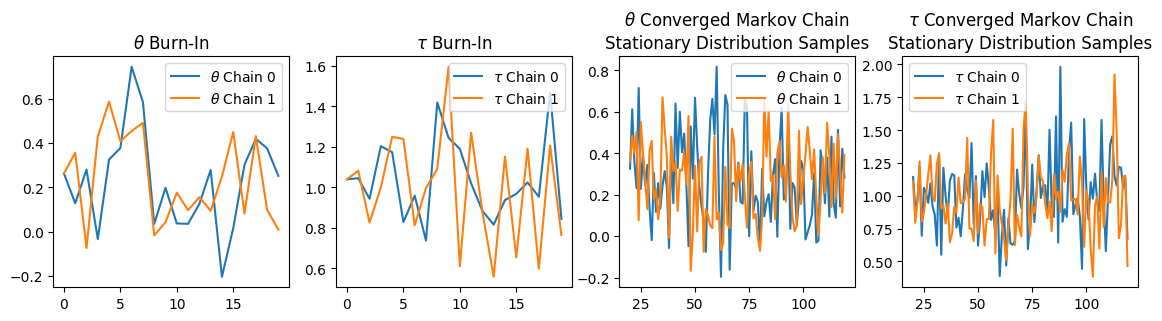

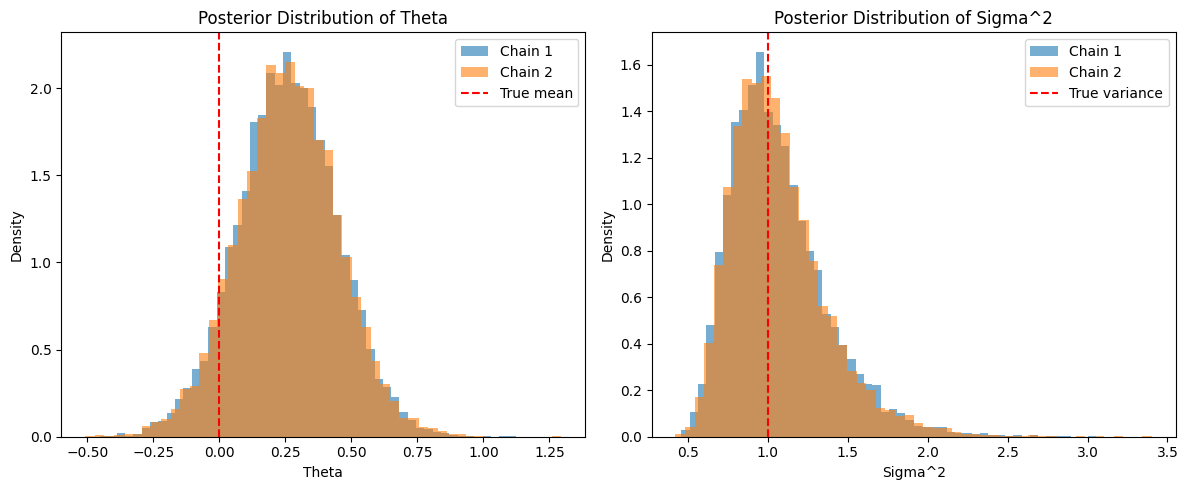

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

n = 30
x = norm(loc=0, scale=1).rvs(size=n)


C, G = 2, 10000  # chains, Gibbs samples
theta, tau = np.zeros([C, G]), np.zeros([C, G])

# Initialization
theta[:, 0] = np.mean(x)  
tau[:, 0] = 1 / np.var(x) 

# Small constant for numerical stability
epsilon = 1e-6

# Gibbs sampling
for c in range(C):
    for g in range(1, G):
        # Sample tau from its full conditional (Gamma distribution)
        shape = n / 2
        rate = 0.5 * np.sum((x - theta[c, g - 1])**2) + epsilon
        tau[c, g] = gamma.rvs(a=shape, scale=1 / max(rate, epsilon))
        
        # Sample theta from its full conditional (Normal distribution)
        mean_theta = np.mean(x)
        var_theta = 1 / (n * tau[c, g])
        theta[c, g] = norm.rvs(loc=mean_theta, scale=np.sqrt(var_theta))

# Convert tau to sigma^2 for visualization
sigma2 = 1 / tau

# Plot diagnostics (burn-in and convergence)
fig1, ax1 = plt.subplots(1, 4, figsize=(14, 3))
ax1[0].set_title("$\\theta$ Burn-In")
ax1[1].set_title("$\\tau$ Burn-In")
ax1[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax1[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

burn = 20
demo = 120
for c in range(C):
    ax1[0].plot(theta[c, :burn], label="$\\theta$ Chain " + str(c))
    ax1[1].plot(tau[c, :burn], label="$\\tau$ Chain " + str(c))
    ax1[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label="$\\theta$ Chain " + str(c))
    ax1[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label="$\\tau$ Chain " + str(c))

ax1[0].legend()
ax1[1].legend()
ax1[2].legend()
ax1[3].legend()

# Plot posterior distributions
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 5))

# Posterior distribution of theta
for c in range(C):
    ax2[0].hist(theta[c, :], bins=50, density=True, alpha=0.6, label=f'Chain {c+1}')
ax2[0].axvline(0, color='red', linestyle="--", label="True mean")
ax2[0].set_title("Posterior Distribution of Theta")
ax2[0].set_xlabel("Theta")
ax2[0].set_ylabel("Density")
ax2[0].legend()

# Posterior distribution of sigma^2
for c in range(C):
    ax2[1].hist(sigma2[c, :], bins=50, density=True, alpha=0.6, label=f'Chain {c+1}')
ax2[1].axvline(1, color='red', linestyle="--", label="True variance")
ax2[1].set_title("Posterior Distribution of Sigma^2")
ax2[1].set_xlabel("Sigma^2")
ax2[1].set_ylabel("Density")
ax2[1].legend()

plt.tight_layout()
plt.show()

## Question 2

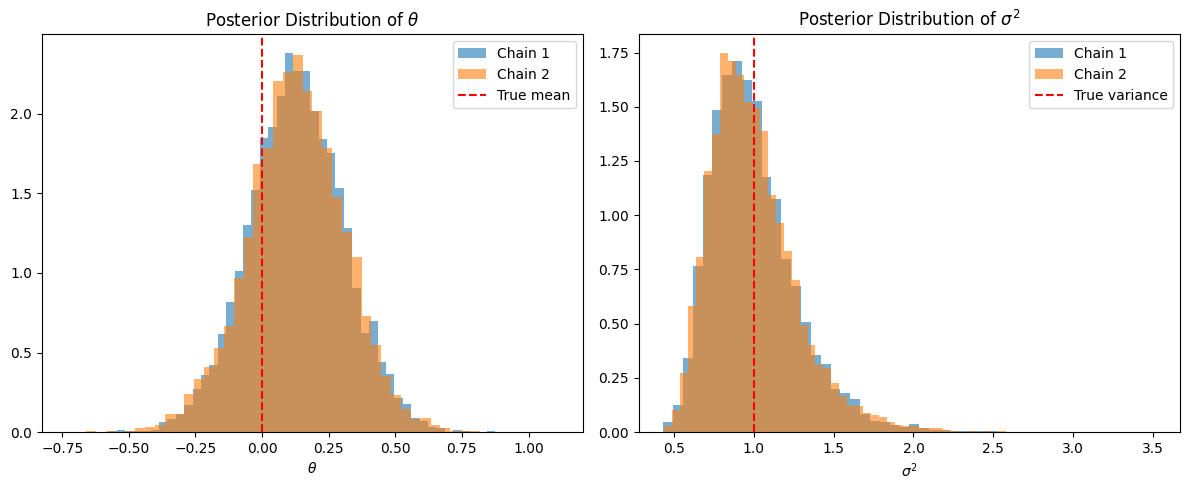

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate data
n = 30
x = stats.norm(loc=0, scale=1).rvs(size=n)

# Gibbs sampler parameters
C, G = 2, 10000  # chains, Gibbs samples
theta, tau = np.zeros([C, G]), np.zeros([C, G])

# Prior hyperparameters
theta_0 = 0    # Prior mean for theta
tau_0 = 1      # Prior precision for theta (1/variance)
alpha = 2      # Shape parameter for tau prior
lambda_ = 2    # Rate parameter for tau prior

# Initialize chains
theta[:, 0] = np.mean(x)  # Start at sample mean
tau[:, 0] = 1 / np.var(x) # Start at inverse sample variance

# Gibbs sampling with informative priors
for c in range(C):
    for g in range(1, G):
        # Sample tau (precision) from Gamma posterior
        theta_current = theta[c, g-1]
        sum_sq = np.sum((x - theta_current)**2)
        shape = (alpha + n) / 2
        rate = (lambda_ + sum_sq) / 2
        tau[c, g] = stats.gamma(a=shape, scale=1/rate).rvs()
        
        # Sample theta from Normal posterior
        tau_current = tau[c, g]
        x_mean = np.mean(x)
        posterior_precision = tau_0 + n * tau_current
        posterior_mean = (tau_0 * theta_0 + n * tau_current * x_mean) / posterior_precision
        theta[c, g] = stats.norm(loc=posterior_mean, scale=np.sqrt(1/posterior_precision)).rvs()

# Convert tau to variance for visualization
sigma2 = 1 / tau

# Plot posterior distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot posterior theta
for c in range(C):
    ax[0].hist(theta[c, 500:], bins=50, density=True, alpha=0.6, label=f'Chain {c+1}')
ax[0].axvline(0, color='red', linestyle="--", label="True mean")
ax[0].set_title("Posterior Distribution of $\\theta$")
ax[0].set_xlabel("$\\theta$")
ax[0].legend()

# Plot posterior sigma^2
for c in range(C):
    ax[1].hist(sigma2[c, 500:], bins=50, density=True, alpha=0.6, label=f'Chain {c+1}')
ax[1].axvline(1, color='red', linestyle="--", label="True variance")
ax[1].set_title("Posterior Distribution of $\\sigma^2$")
ax[1].set_xlabel("$\\sigma^2$")
ax[1].legend()

plt.tight_layout()
plt.show()

## Question 3